In [15]:
import json
import pandas as pd
import numpy as np
import netwulf as nw
import matplotlib.pyplot as plt
import networkx as nx
import random as random 
pd.set_option('display.max_colwidth', None)

In [16]:
# read json file
with open('data/characters.json') as f:
    data = json.load(f)

In [17]:
# convert json to dataframe where each row is a character and each column is a key
df = pd.DataFrame(data['characters'])


# remove rows with no character link
df = df[df['characterLink'].notnull()]

# print size of dataframe
print(df.shape)

# remove characterImageThumb, characterImageFull, marriedEngaged, kingsguard, guardedBy, servedBy, guardianOf
df = df.drop(['characterLink', 'actorLink', 'characterImageThumb', 'characterImageFull', 'marriedEngaged', 'kingsguard', 'guardedBy', 'servedBy', 'guardianOf'], axis=1)
df.head()
# print rows where housename is not nan
# df[df['houseName'].notnull()]

# df.houseName.value_counts()


(368, 25)


,characterName,actorName,houseName,royal,parents,siblings,killedBy,nickname,killed,parentOf,serves,actors,allies,abductedBy,abducted,sibling
0,Addam Marbrand,B.J. Hogg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aeron Greyjoy,Michael Feast,Greyjoy,NaN,NaN,"[Balon Greyjoy, Euron Greyjoy]",NaN,Damphair,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aerys II Targaryen,David Rintoul,Targaryen,True,NaN,[Rhaella Targaryen],[Jaime Lannister],The Mad King,"[Brandon Stark, Rickard Stark]","[Daenerys Targaryen, Rhaegar Targaryen, Viserys Targaryen]",NaN,NaN,NaN,NaN,NaN,NaN
4,Akho,Chuku Modu,NaN,NaN,NaN,NaN,[Daario Naharis],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Alliser Thorne,Owen Teale,NaN,NaN,NaN,NaN,[Jon Snow],NaN,[Jon Snow],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# create network of characters and link them to their houses
# create graph
G = nx.Graph()

# add nodes
G.add_nodes_from(df['characterName'])

# add one edge between each character if they are in the same house
for i in range(len(df)):
    for j in range(i+1, len(df)):
        if df.iloc[i]['houseName'] == df.iloc[j]['houseName']:
            G.add_edge(df.iloc[i]['characterName'], df.iloc[j]['characterName'])


In [19]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 349
Number of edges: 212


In [20]:
# add node attributes to the graph from the df.columns names
for i in range(len(df)):
    for col in df.columns:
        G.nodes[df.iloc[i]['characterName']][col] = df.iloc[i][col]

In [21]:
# remove nodes with no edge
G.remove_nodes_from(list(nx.isolates(G)))

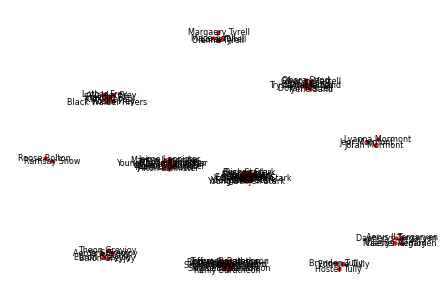

In [22]:
# draw graph
nx.draw(G, with_labels=True, node_size=10, node_color='red', edge_color='black', font_size=8, width=0.1)

In [23]:
# nw.visualize(G)

#### **Episodes**

In [24]:
# read episodes.json file
with open('data/episodes.json') as f:
    data_episodes = json.load(f)


In [25]:
# convert json to dataframe where each row is an scene and each column is a key
df_episodes = pd.DataFrame(data_episodes['episodes'])

# explode scenes column
df_episodes = df_episodes.explode('scenes')

# extract all scenes from the dataframe and create a new dataframe
df_scenes = pd.DataFrame(df_episodes['scenes'].tolist())

# make a list of episode numbers
episodeNum = []
seasonNum = []
for i in range(len(df_episodes)):
    episodeNum.append(df_episodes.iloc[i]['episodeNum'])
    seasonNum.append(df_episodes.iloc[i]['seasonNum'])

df_scenes['episodeNumber'] = episodeNum
df_scenes['seasonNumber'] = seasonNum

# remove greensight, altLocation, warg and flashback columns
df_scenes = df_scenes.drop(['greensight', 'altLocation', 'warg', 'flashback'], axis=1)
df_scenes.head()

# in the characters column, extract the name of each character and add it to a list where each row is a scene
characters = []
for i in range(len(df_scenes)):
    characters.append([])
    for j in range(len(df_scenes['characters'][i])):
        characters[i].append(df_scenes['characters'][i][j]['name'])

# add the list of characters to the dataframe
df_scenes['characters'] = characters


In [26]:
df_scenes

,sceneStart,sceneEnd,location,subLocation,characters,episodeNumber,seasonNumber
0,0:00:40,0:01:45,The Wall,Castle Black,"[Gared, Waymar Royce, Will]",1,1
1,0:01:45,0:03:24,North of the Wall,The Haunted Forest,"[Gared, Waymar Royce, Will]",1,1
2,0:03:24,0:03:31,North of the Wall,The Haunted Forest,"[Will, Wight Wildling Girl]",1,1
3,0:03:31,0:03:38,North of the Wall,The Haunted Forest,[Will],1,1
4,0:03:38,0:03:44,North of the Wall,The Haunted Forest,[],1,1
...,...,...,...,...,...,...,...
4160,1:17:24,1:17:55,The North,Winterfell,[Sansa Stark],6,8
4161,1:17:55,1:18:11,The Sunset Sea,NaN,[Arya Stark],6,8
4162,1:18:11,1:18:20,The Wall,Castle Black,"[Jon Snow, Tormund Giantsbane, Ghost]",6,8
4163,1:18:20,1:19:40,North of the Wall,The Wall,"[Jon Snow, Tormund Giantsbane, Ghost]",6,8


In [27]:
# create graph of characters
G = nx.Graph()

# add nodes
G.add_nodes_from(df['characterName'])

# add a weighted edge between each character if they appear in the same scene
for i in range(len(df_scenes)):
    for j in range(len(df_scenes['characters'][i])):
        for k in range(j+1, len(df_scenes['characters'][i])):
            if G.has_edge(df_scenes['characters'][i][j], df_scenes['characters'][i][k]):
                G[df_scenes['characters'][i][j]][df_scenes['characters'][i][k]]['weight'] += 1
            else:
                G.add_edge(df_scenes['characters'][i][j], df_scenes['characters'][i][k], weight=1)



In [28]:
print(G.number_of_nodes())
print(G.number_of_edges())

602
4236


In [29]:
# add attributes to the nodes
for i in range(len(df)):
    for col in df.columns:
        G.nodes[df.iloc[i]['characterName']][col] = df.iloc[i][col]

In [30]:
import community as community_louvain

# Find communities
partition = community_louvain.best_partition(G)

len(set(partition.values()))

36

In [31]:
# make hex colour schema for communities
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                for i in range(len(set(partition.values())))]

color_map = {}
for i, community in enumerate(set(partition.values())):
    color_map[community] = colors[i]

# assign community, color and degree to each node
for node in G.nodes:
    G.nodes[node]['community'] = partition[node]
    G.nodes[node]['color'] = color_map[partition[node]]
    G.nodes[node]['degree'] = G.degree[node]

TypeError: 'NoneType' object is not subscriptable

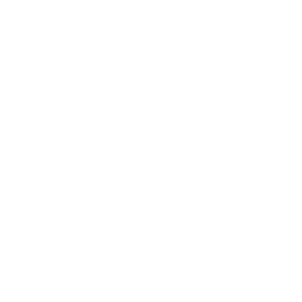

In [35]:
network, config = nw.visualize(G, plot_in_cell_below=False)
fig, ax = nw.draw_netwulf(network)
# plt.savefig("BAnetworkWithDegreeColoured.pdf")

In [ ]:
# print node attributes for nodes with highest degree
for node in sorted(G.nodes, key=lambda x: G.degree(x), reverse=True)[:20]:
    print(node, G.nodes[node])